<a href="https://colab.research.google.com/github/veranoviani/Tugas-Time-Series-Analysis-Forecasting---Vera-Noviani/blob/main/Time_Series_Advance_Day_12_Vera_Noviani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install dan Load Data

In [ ]:
!pip install sktime[all_extras]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# utilities packages
import datetime
import os

# data wrangling and transformation package
import numpy as np
import pandas as pd
import statsmodels.api as sm

# data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

# time series modeling
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot
from statsmodels.stats.diagnostic import acorr_ljungbox

# load sktime for time series forecasting
from sktime.utils.plotting import plot_series # from plotting
from sktime.forecasting.naive import NaiveForecaster # for naive forecasting
from sktime.forecasting.arima import AutoARIMA # for automated ARIMA forecasting
from sktime.forecasting.exp_smoothing import ExponentialSmoothing # for exponential smoothing forecasting
from sktime.forecasting.ets import AutoETS # for automated ETS forecasting 
from sktime.forecasting.tbats import TBATS # for TBATS forecasting
from sktime.forecasting.fbprophet import Prophet # for Prophet forecasting
from sktime.forecasting.base import ForecastingHorizon # for creating forecast horizon
from sktime.forecasting.model_selection import (
    temporal_train_test_split, 
    ExpandingWindowSplitter, 
    SlidingWindowSplitter
) # for train-test split and cross validation
from sktime.performance_metrics.forecasting import (
    mean_absolute_error, 
    mean_squared_error, 
    mean_absolute_percentage_error
) # for evaluation metrics
from sktime.forecasting.model_evaluation import evaluate # for evaluating CV results

%matplotlib inline

In [ ]:
df= pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/time_series_data/superstore_time_series_dataset/superstore_train.csv")

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         8000 non-null   int64  
 1   Order ID       8000 non-null   object 
 2   Order Date     8000 non-null   object 
 3   Ship Date      8000 non-null   object 
 4   Ship Mode      8000 non-null   object 
 5   Customer ID    8000 non-null   object 
 6   Customer Name  8000 non-null   object 
 7   Segment        8000 non-null   object 
 8   Country        8000 non-null   object 
 9   City           8000 non-null   object 
 10  State          8000 non-null   object 
 11  Postal Code    8000 non-null   int64  
 12  Region         8000 non-null   object 
 13  Product ID     8000 non-null   object 
 14  Category       8000 non-null   object 
 15  Sub-Category   8000 non-null   object 
 16  Product Name   8000 non-null   object 
 17  Sales          8000 non-null   float64
 18  Quantity

# No 1 Jumlah pembeli, jumlah transaksi, GMV, dan profit yang diperoleh dengan rentang waktu harian, mingguan dan bulanan

In [ ]:
df["Order Date"] = pd.to_datetime(df["Order Date"],format="%Y-%m-%d")

In [ ]:
#untuk bulanan
df["months"] = df["Order Date"].dt.month

#untuk harian
df["days"] = df['Order Date'].dt.day

#untuk mingguan
df["weekdays"] = [x.strftime('%A') for x in df["Order Date"]]

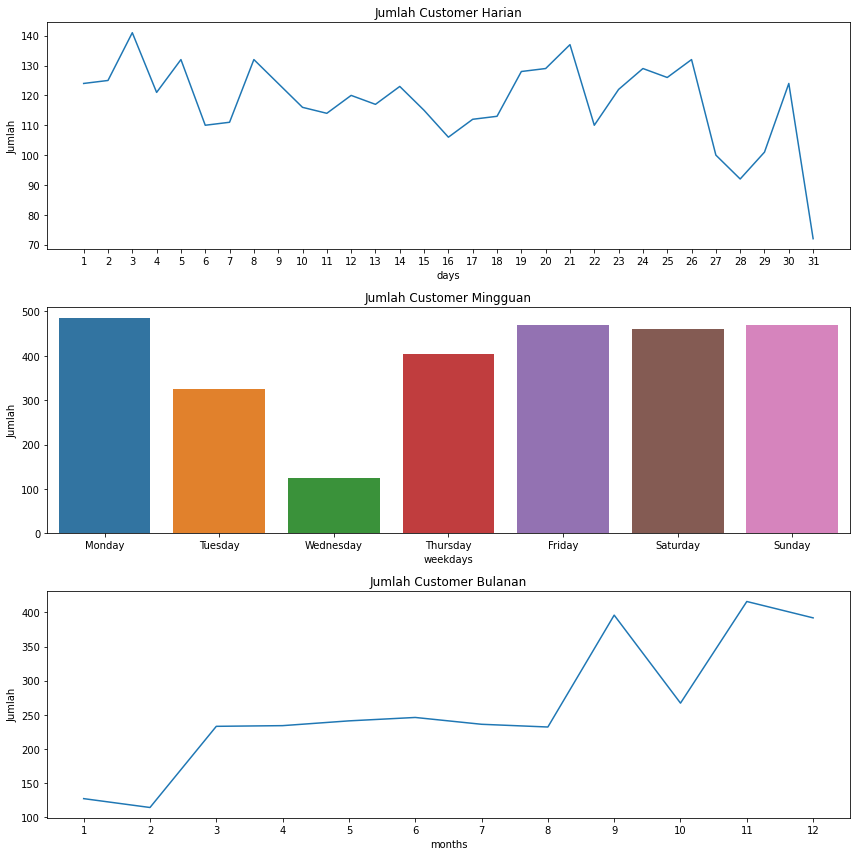

In [ ]:
#daily
customer_daily = df.groupby("days",as_index=False).agg({"Customer ID":lambda x: x.nunique()})

#mingguan
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
customer_weekdays = df.groupby("weekdays",as_index=False).agg({"Customer ID":lambda x: x.nunique()})

#bulanan
customer_months = df.groupby("months",as_index=False).agg({"Customer ID":lambda x: x.nunique()})


#visualisasi
plt.figure(figsize=(12,12))
plt.subplot(311)
sns.lineplot(data=customer_daily,x="days",y="Customer ID").set_title("Jumlah Customer Harian")
plt.xticks([i for i in np.arange(1,32)])
plt.ylabel("Jumlah")

plt.subplot(312)
sns.barplot(data=customer_weekdays,x="weekdays",y="Customer ID",order=order).set_title("Jumlah Customer Mingguan")
plt.ylabel("Jumlah")

plt.subplot(313)
sns.lineplot(data=customer_months,x="months",y="Customer ID").set_title("Jumlah Customer Bulanan")
plt.xticks([i for i in np.arange(1,13)])
plt.ylabel("Jumlah")

plt.tight_layout()
plt.show()

1.Jumlah customer yang datang berkunjung memiliki trend menurun dari tanggal 1-16 dan mengalami kenaikan sekitar tanggal 20 lalu mengalami penurunan.Yang di perkirakan kemungkinan type customer adalah customer yang berbelanja kebutuhan selama 2 minggu pemakaian

2.senin jumat sabtu dan minggu adalah hari dimana customer banyak berkunjung

3.trend peningkatan customer datang berkunjung berada dibulan 8-11



  # Jumlah Transaksi




In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'months',
       'days', 'weekdays'],
      dtype='object')

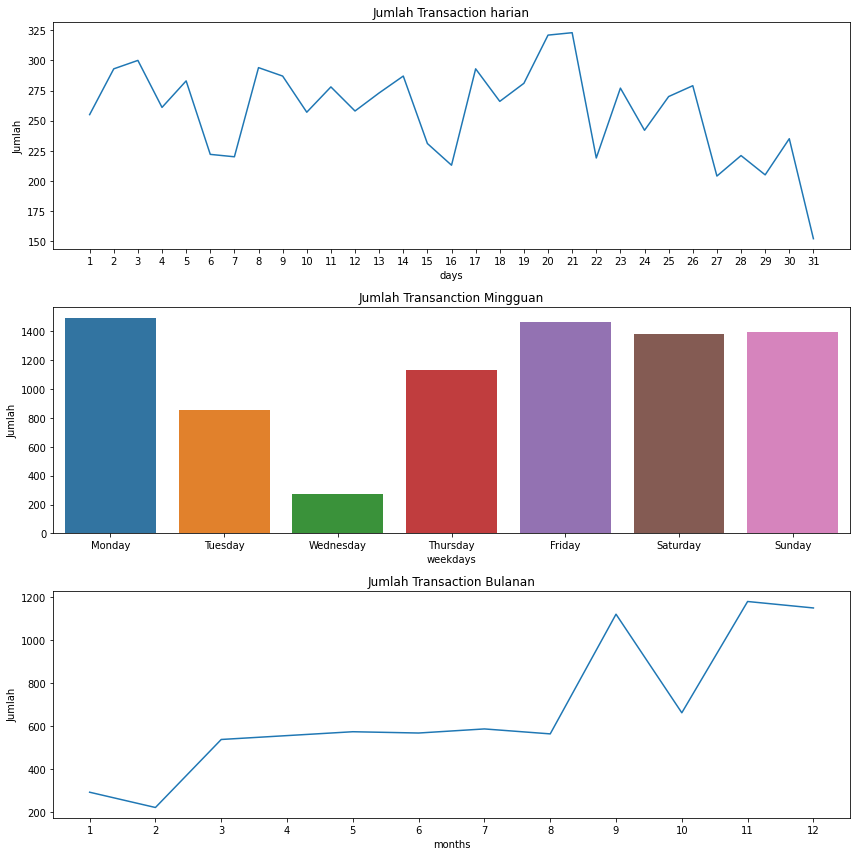

In [ ]:
#daily
trx_daily = df.groupby("days",as_index=False)["Order ID"].size()

#mingguan
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
trx_weekdays = df.groupby("weekdays",as_index=False)["Order ID"].size()

#bulanan
trx_months = df.groupby("months",as_index=False)["Order ID"].size()


#visualisasi
plt.figure(figsize=(12,12))
plt.subplot(311)
sns.lineplot(data=trx_daily,x="days",y="size").set_title("Jumlah Transaction harian")
plt.xticks([i for i in np.arange(1,32)])
plt.ylabel("Jumlah")

plt.subplot(312)
sns.barplot(data=trx_weekdays,x="weekdays",y="size",order=order).set_title("Jumlah Transanction Mingguan")
plt.ylabel("Jumlah")

plt.subplot(313)
sns.lineplot(data=trx_months,x="months",y="size").set_title("Jumlah Transaction Bulanan")
plt.xticks([i for i in np.arange(1,13)])
plt.ylabel("Jumlah")

plt.tight_layout()
plt.show()

1.Jumlah transaksi harian juga memiliki trend menurun. yang dimana 2 minggu pertama trendnya cukup stabil lalu minggu berikutnya ada sedikit kenaikan tap tidak berlangsung lama setelah tanggal 21 mengalami penurunan hingga akhir bulan.

2.Senin jumat sabtu dan minggu adalah hari dimana jumlah transaksi harian yang paling banyak

3.Trend peningkatan transaksi harian bulanan berada dibulan 9-12

  # GMV

In [ ]:
df['GMV'] = df["Quantity"]*(df["Sales"] - df["Discount"]*df['Sales'])

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,months,days,weekdays,GMV
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,8,Tuesday,523.920000
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,8,Tuesday,2195.820000
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,12,Sunday,29.240000
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,11,Sunday,2633.338125
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,11,Sunday,35.788800


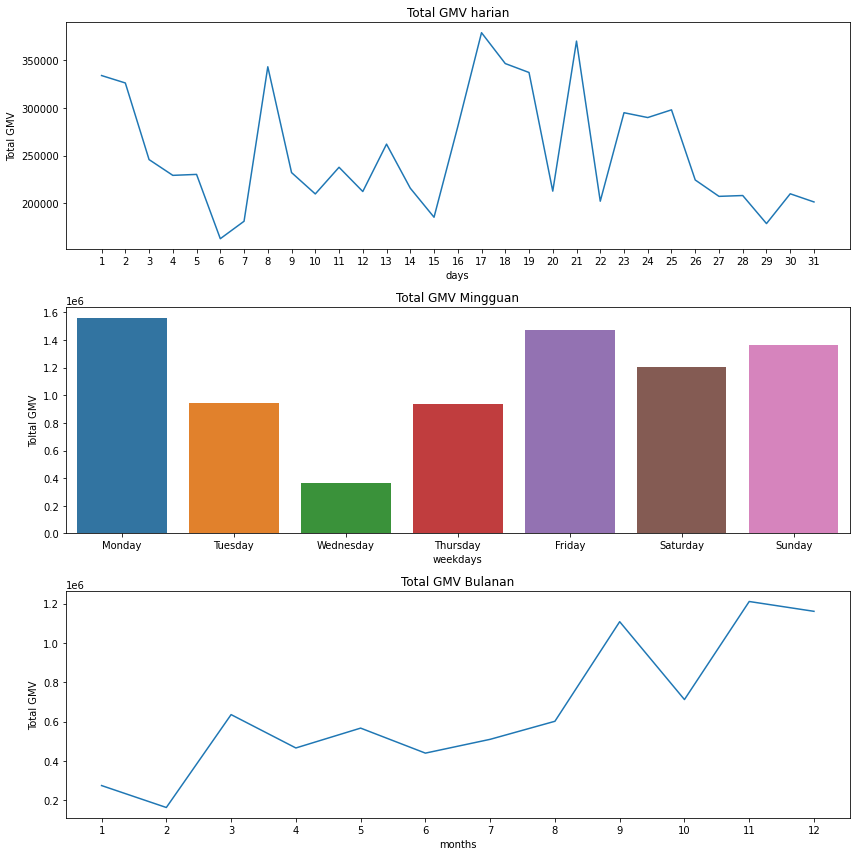

In [ ]:
#daily 
gmv_daily = df.groupby("days",as_index=False)["GMV"].sum()

#mingguan
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
gmv_weekdays = df.groupby("weekdays",as_index=False)["GMV"].sum()

#bulanan
gmv_months = df.groupby("months",as_index=False)["GMV"].sum()


#visualisasi
plt.figure(figsize=(12,12))
plt.subplot(311)
sns.lineplot(data=gmv_daily,x="days",y="GMV").set_title("Total GMV harian")
plt.xticks([i for i in np.arange(1,32)])
plt.ylabel("Total GMV")

plt.subplot(312)
sns.barplot(data=gmv_weekdays,x="weekdays",y="GMV",order=order).set_title("Total GMV Mingguan")
plt.ylabel("Toltal GMV")

plt.subplot(313)
sns.lineplot(data=gmv_months,x="months",y="GMV").set_title("Total GMV Bulanan")
plt.xticks([i for i in np.arange(1,13)])
plt.ylabel("Total GMV")

plt.tight_layout()
plt.show()

1.Jumlah GMV harian terlihat adanya trend turun di minggu awal, kemudian naik di minggu kedua dan terlihat relative konstan hingga pertengahan minggu ketiga mengalami tren trun kembali sampai akhir bulan.

2.Jumlah GMV yang banyak pada hari senin,jumat,sabtu dan mingg

3.Adanya trend peningkatan bulanan pada GMV dari bulan 3 hingga 11

  # Profit

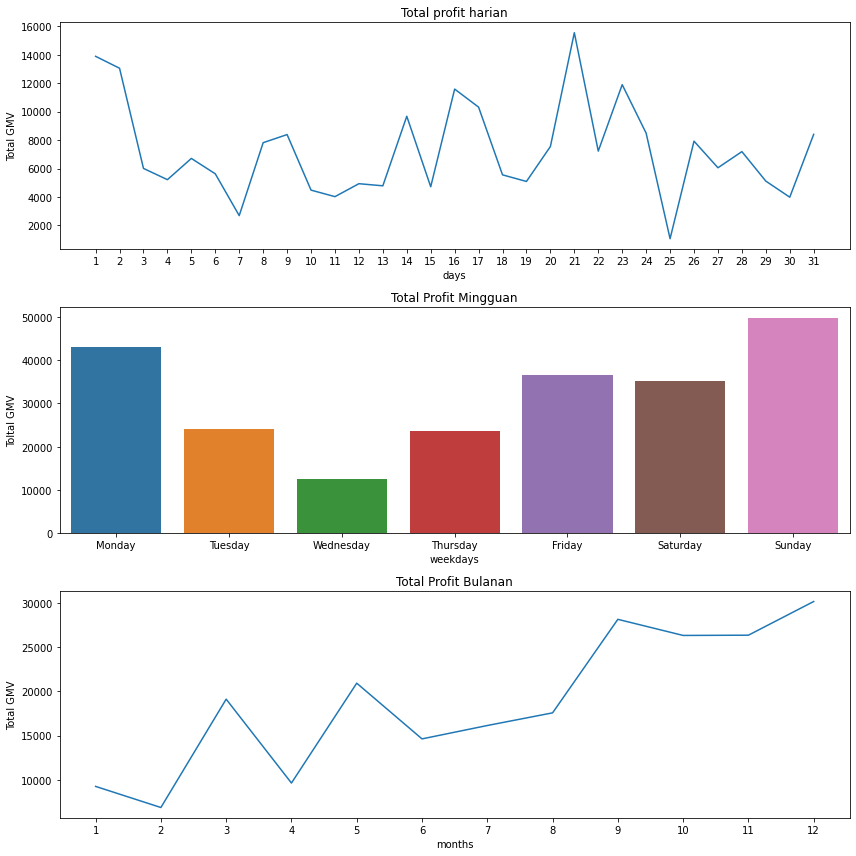

In [ ]:
#daily 
profit_daily = df.groupby("days",as_index=False)["Profit"].sum()

#mingguan
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
profit_weekdays = df.groupby("weekdays",as_index=False)["Profit"].sum()

#bulanan
profit_months = df.groupby("months",as_index=False)["Profit"].sum()


#visualisasi
plt.figure(figsize=(12,12))
plt.subplot(311)
sns.lineplot(data=profit_daily,x="days",y="Profit").set_title("Total profit harian")
plt.xticks([i for i in np.arange(1,32)])
plt.ylabel("Total GMV")

plt.subplot(312)
sns.barplot(data=profit_weekdays,x="weekdays",y="Profit",order=order).set_title("Total Profit Mingguan")
plt.ylabel("Toltal GMV")

plt.subplot(313)
sns.lineplot(data=profit_months,x="months",y="Profit").set_title("Total Profit Bulanan")
plt.xticks([i for i in np.arange(1,13)])
plt.ylabel("Total GMV")

plt.tight_layout()
plt.show()

1.Profit mengalamin penurunan di 7 hari pertama pada awal bulan dan mulai ada peningkatan hingga tanggal 21 dan mengalami trend turun pada akhir bulan. 

2.Jika diperhatikan dari hari, profit cukup bagus pada hari minggu dan senin.

3.Trend profit meningkat di bulan 9-12
jika diperhatikan bahwa terdapat kesamaan pola antara jumlah transaksi,GMV dan profit, jadi dengan besarnya jumlah transaksi yang terjadi maka GMV dan profit akan semakin besar

# No 2. Monthly retention dari kegiatan transaksi yang terjadi di dalam platform e-commerce



In [ ]:
#analisis rentention
df_ret = df.copy()

import datetime as dt
# A function that will parse the date Time based cohort:  1 day of month
def get_month(x): return dt.datetime(x.year, x.month, 1) 

# Create transaction_date column based on month and store in TransactionMonth
df_ret['TransactionMonth'] = df_ret['Order Date'].apply(get_month) 

# Grouping by customer_id and select the InvoiceMonth value
grouping = df_ret.groupby('Customer ID')['TransactionMonth'] 

# Assigning a minimum InvoiceMonth value to the dataset
df_ret['CohortMonth'] = grouping.transform('min')


df_ret.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Quantity,Discount,Profit,months,days,weekdays,GMV,monht_year,TransactionMonth,CohortMonth
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,2,0.00,41.9136,11,8,Tuesday,523.920000,2016-11,2016-11-01,2015-10-01
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,3,0.00,219.5820,11,8,Tuesday,2195.820000,2016-11,2016-11-01,2015-10-01
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,2,0.00,6.8714,6,12,Sunday,29.240000,2016-06,2016-06-01,2016-06-01
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,5,0.45,-383.0310,10,11,Sunday,2633.338125,2015-10,2015-10-01,2015-10-01
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,2,0.20,2.5164,10,11,Sunday,35.788800,2015-10,2015-10-01,2015-10-01


In [ ]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

# Getting the integers for date parts from the `InvoiceDay` column
transcation_year, transaction_month, _ = get_date_int(df_ret, 'TransactionMonth')

# Getting the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, _ = get_date_int(df_ret, 'CohortMonth')


#  Get the  difference in years
years_diff = transcation_year - cohort_year

# Calculate difference in months
months_diff = transaction_month - cohort_month

df_ret['CohortIndex'] = years_diff * 12 + months_diff  + 1 

df_ret.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Discount,Profit,months,days,weekdays,GMV,monht_year,TransactionMonth,CohortMonth,CohortIndex
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,0.00,41.9136,11,8,Tuesday,523.920000,2016-11,2016-11-01,2015-10-01,14
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,0.00,219.5820,11,8,Tuesday,2195.820000,2016-11,2016-11-01,2015-10-01,14
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,0.00,6.8714,6,12,Sunday,29.240000,2016-06,2016-06-01,2016-06-01,1
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,0.45,-383.0310,10,11,Sunday,2633.338125,2015-10,2015-10-01,2015-10-01,1
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,0.20,2.5164,10,11,Sunday,35.788800,2015-10,2015-10-01,2015-10-01,1


In [ ]:
df_ret.plot([])

NameError: ignored

In [ ]:
# Counting daily active user from each chort
grouping = df_ret.groupby(['CohortMonth', 'CohortIndex'])



# Counting number of unique customer Id's falling in each group of CohortMonth and CohortIndex
cohort_data = grouping['Customer ID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()


 # Assigning column names to the dataframe created above
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                 columns ='CohortIndex',
                                 values = 'Customer ID')

# Printing top 5 rows of Dataframe
cohort_data.head()

,CohortMonth,CohortIndex,Customer ID
0,2014-01-01,1,27
1,2014-01-01,4,2
2,2014-01-01,5,2
3,2014-01-01,7,2
4,2014-01-01,8,1


In [ ]:
cohort_sizes = cohort_counts.iloc[:,0]

retention = cohort_counts.divide(cohort_sizes, axis=0)

# Coverting the retention rate into percentage and Rounding off.
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2014-01-01,100.0,NaN,NaN,7.4,7.4,NaN,7.4,3.7,3.7,11.1,...,14.8,11.1,18.5,11.1,3.7,3.7,22.2,33.3,22.2,14.8
2014-02-01,100.0,5.9,5.9,NaN,NaN,11.8,5.9,17.6,5.9,5.9,...,11.8,5.9,23.5,NaN,5.9,23.5,5.9,29.4,NaN,NaN
2014-03-01,100.0,5.9,2.0,13.7,9.8,NaN,9.8,3.9,7.8,7.8,...,11.8,13.7,9.8,11.8,25.5,3.9,21.6,17.6,NaN,NaN
2014-04-01,100.0,6.8,NaN,6.8,4.5,6.8,6.8,13.6,11.4,2.3,...,11.4,11.4,13.6,15.9,13.6,13.6,20.5,NaN,NaN,NaN
2014-05-01,100.0,10.2,6.1,4.1,16.3,6.1,16.3,16.3,6.1,4.1,...,10.2,8.2,30.6,16.3,22.4,16.3,NaN,NaN,NaN,NaN
2014-06-01,100.0,4.9,NaN,7.3,4.9,14.6,9.8,2.4,9.8,12.2,...,4.9,22.0,7.3,29.3,22.0,NaN,NaN,NaN,NaN,NaN
2014-07-01,100.0,8.8,11.8,NaN,14.7,20.6,8.8,2.9,17.6,2.9,...,17.6,8.8,23.5,17.6,NaN,NaN,NaN,NaN,NaN,NaN
2014-08-01,100.0,11.1,4.4,13.3,6.7,4.4,6.7,4.4,8.9,2.2,...,26.7,17.8,17.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-01,100.0,6.2,10.8,12.3,1.5,4.6,7.7,10.8,9.2,1.5,...,16.9,16.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
retention.index = retention.index.strftime('%Y-%m')
retention.index

Index(['2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
       '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12',
       '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07',
       '2017-09', '2017-10', '2017-11'],
      dtype='object', name='CohortMonth')

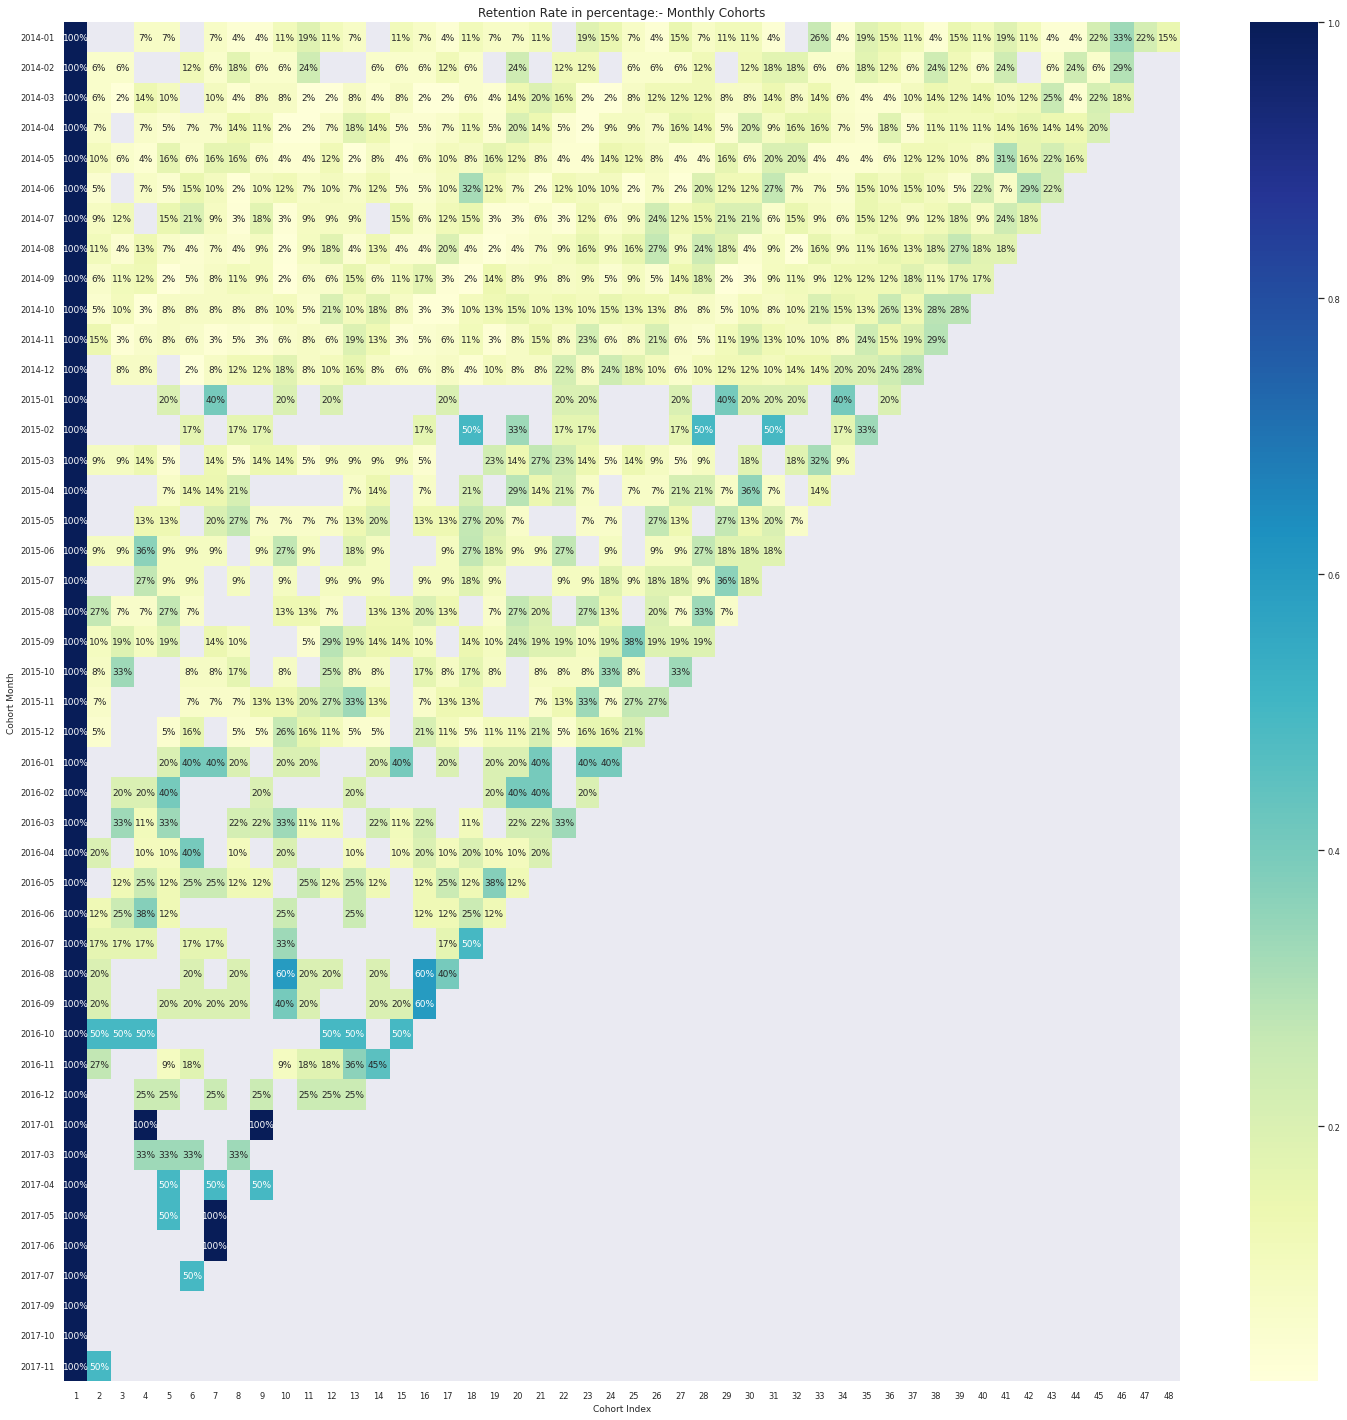

In [ ]:
# Initialize the figure
plt.figure(figsize=(25,25))
sns.set(font_scale=0.75)

# Adding a title
plt.title('Retention Rate in percentage:- Monthly Cohorts', fontsize = 12)

# Creating the seaborn based heatmap
sns.heatmap(retention, annot=True, fmt= '.0%',cmap='YlGnBu')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()

Dari retention rate terlihat bahwa rentang 2-3 bulan setelah customer berbelanja maka terdapat kemungkinan besar customer akan kembali berbelanja. Tentunya ini bisa menjadi salah satu hal yang bisa di perhatikan dalam langkah penerapan menjaga kualitas product agar customer tetap melakukan retention dan memberikan beberapa penawaran product baru.

# No 3 Identifikasi produk-produk apa saja yang membawa profit terbesar dalam 3 bulan terakhir 


In [ ]:
product_3m = df[(df['Order Date']>='2017-10-01 00:00:00')&(df['Order Date']<='2017-12-30 00:00:00')].copy()

In [ ]:
df.groupby("Product Name")["Profit"].sum().nlargest()

Product Name
Canon imageCLASS 2200 Advanced Copier                         18479.9472
Hewlett Packard LaserJet 3310 Copier                           6743.8876
Ativa V4110MDD Micro-Cut Shredder                              3772.9461
3D Systems Cube Printer, 2nd Generation, Magenta               3717.9714
Plantronics Savi W720 Multi-Device Wireless Headset System     3696.2820
Name: Profit, dtype: float64

Jadi profit terbesar dalam 3 bulan terakhir adalah Canon imageCLASS 2200 Advanced Copier

# No 4 Forecasting Jumlah Visitor

<AxesSubplot:>

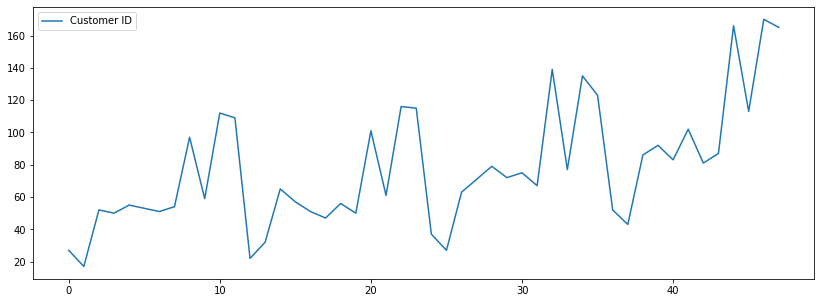

In [ ]:
df["monht_year"] = df['Order Date'].dt.to_period('M')
df.groupby(["monht_year"],as_index=False).agg({'Customer ID':lambda x: x.nunique()}).plot(figsize=(14,5))

In [ ]:
df_customer = df.groupby(["Order Date"],as_index=False).agg({'Customer ID':lambda x: x.nunique()})
df_customer = df_customer[(df_customer["Order Date"]>="2016-01-01 00:00:00")]
df_customer.shape

(617, 2)

In [ ]:
#data forecasting
cust_forecast = df_customer.set_index("Order Date")
cust_forecast.columns = ["Jumlah Pengunjung"]
cust_forecast.index = pd.PeriodIndex(cust_forecast.index, freq = 'D')
cust_forecast.head()

,Jumlah Pengunjung
Order Date,
2016-01-02,1
2016-01-03,1
2016-01-04,2
2016-01-05,1
2016-01-07,1


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='Jumlah Pengunjung'>)

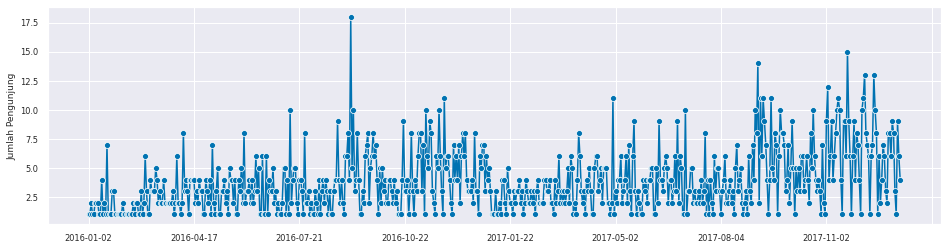

In [ ]:
plot_series(cust_forecast["Jumlah Pengunjung"])

<AxesSubplot:>

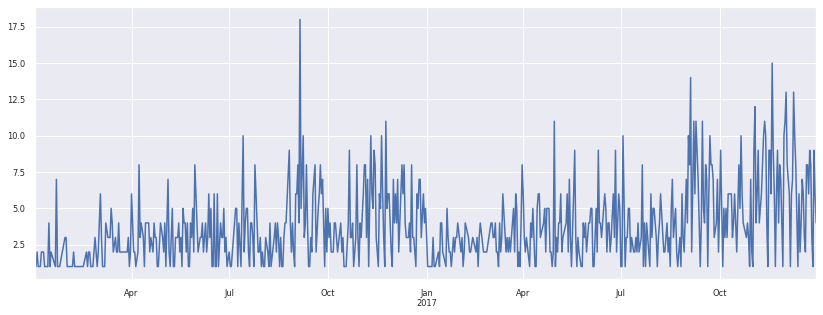

In [ ]:
cust_forecast["Jumlah Pengunjung"].plot(figsize=(14,5))

In [ ]:
#membuat function
def test_stationarity(ts,window=10,**kwargs):
    #membuat dataframe untuk plotingan
    plot_df = pd.DataFrame(ts)
    plot_df["rolling_mean"] = ts.rolling(window).mean()
    plot_df['rolling_std'] = ts.rolling(window).std()
    #hitung test augmented dicky-fuller
    p_val = adfuller(ts)[1]
    ax = plot_df.plot(**kwargs)
    ax.set_title(f"Dicky-Fuller p-value :{p_val:.3f}")

Jumlah Pengunjung    None
dtype: object

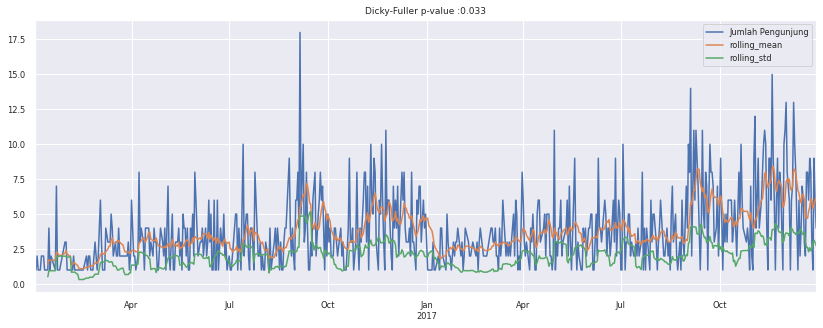

In [ ]:
cust_forecast.apply(test_stationarity,figsize=(14, 5))

In [ ]:
# Do train-test split
y_train, y_test = temporal_train_test_split(cust_forecast["Jumlah Pengunjung"], test_size=29)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='Jumlah Pengunjung'>)

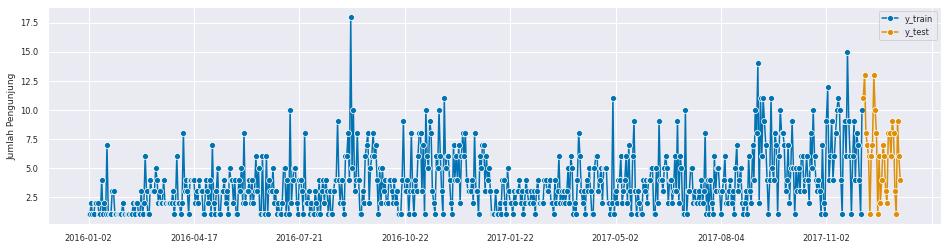

In [ ]:
# check the time series after splitting
plot_series(y_train, y_test, labels=["y_train", "y_test"])

In [ ]:
#specific data points
fh = ForecastingHorizon(y_test.index, is_relative=False)

In [ ]:
#Exponential Smoothing
# define ets forecaster model
ets_forecaster = ExponentialSmoothing(trend=None, seasonal='multiplicative', sp=250)

In [ ]:
# fit forecaster to train data
ets_forecaster.fit(y_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


ExponentialSmoothing(seasonal='multiplicative', sp=250)

In [ ]:
# do prediction based on forecast horizon we already defined
y_pred_ets = ets_forecaster.predict(fh=fh)

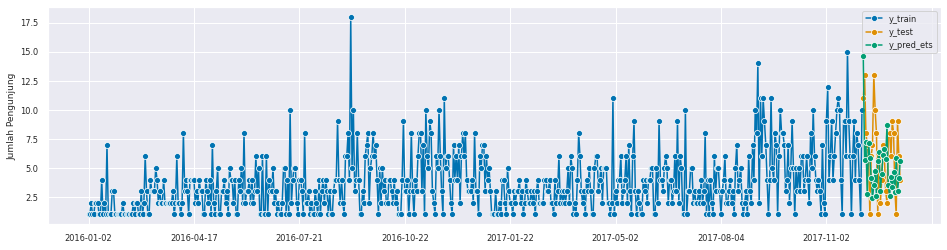

In [ ]:
# plot the forecast result
plot_series(y_train, y_test, y_pred_ets, labels=["y_train", "y_test", "y_pred_ets"]);

In [ ]:
mean_absolute_percentage_error(y_test, y_pred_ets) * 100

97.09652995015767

In [ ]:
#AutoETS
# define auto ets forecaster model
auto_ets_forecaster = AutoETS(auto=True, sp=250)

In [66]:
# fit forecaster to train data
auto_ets_forecaster.fit(y_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: 

AutoETS(auto=True, sp=250)

In [67]:
# do prediction based on forecast horizon we already defined
y_pred_auto_ets = auto_ets_forecaster.predict(fh=fh)

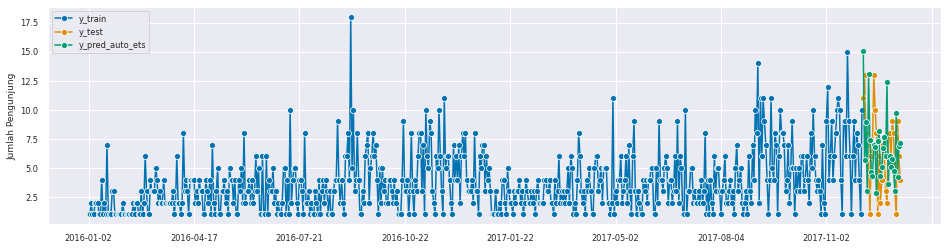

In [68]:
# plot the forecast result
plot_series(y_train, y_test, y_pred_auto_ets, labels=["y_train", "y_test", "y_pred_auto_ets"]);

In [69]:
mean_absolute_percentage_error(y_test, y_pred_auto_ets) * 100

130.31968900942155

Dari hasil model terlihat nilai MAPE terkecil adalah model ets sebesar 97.09652995015767

  # Forecasting Jumlah Transaksi

<AxesSubplot:>

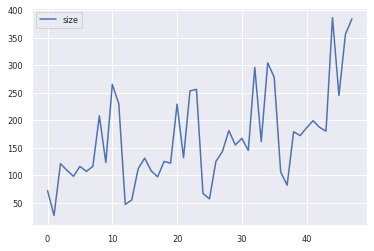

In [70]:
df.groupby(["monht_year"],as_index=False)["Order ID"].size().plot()

In [71]:
df_jml_trx = df.groupby(["Order Date"],as_index=False)['Order ID'].size()
df_jml_trx = df_jml_trx[(df_jml_trx["Order Date"]>="2016-01-01 00:00:00")]
df_jml_trx.shape

(617, 2)

In [72]:
#data forecasting
trx_forecast = df_jml_trx.set_index("Order Date")
trx_forecast.columns = ["Jumlah trx"]
trx_forecast.index = pd.PeriodIndex(trx_forecast.index, freq = 'D')
trx_forecast.head()

,Jumlah trx
Order Date,
2016-01-02,2
2016-01-03,1
2016-01-04,3
2016-01-05,3
2016-01-07,1


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='Jumlah trx'>)

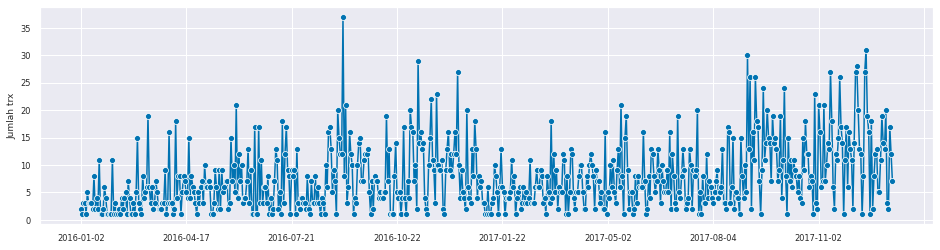

In [73]:
plot_series(trx_forecast["Jumlah trx"])

Jumlah trx    None
dtype: object

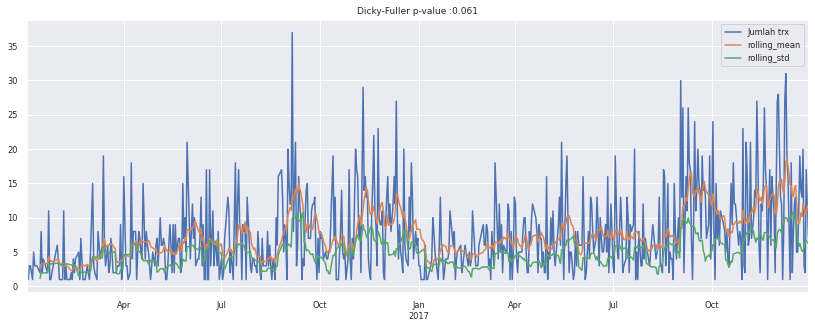

In [74]:
trx_forecast.apply(test_stationarity,figsize=(14,5))

In [75]:
# Do train-test split
y_train, y_test = temporal_train_test_split(trx_forecast["Jumlah trx"], test_size=29)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='Jumlah trx'>)

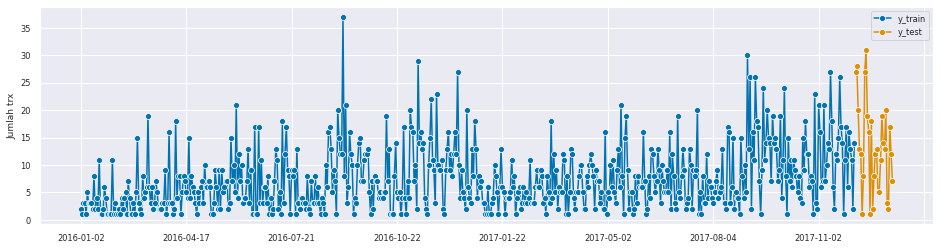

In [76]:
# check the time series after splitting
plot_series(y_train, y_test, labels=["y_train", "y_test"])

In [77]:
#specific data points
fh = ForecastingHorizon(y_test.index, is_relative=False)

In [78]:
#Exponential Smoothing
# define ets forecaster model
ets_forecaster = ExponentialSmoothing(trend=None, seasonal='multiplicative', sp=250)

In [79]:
# fit forecaster to train data
ets_forecaster.fit(y_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


ExponentialSmoothing(seasonal='multiplicative', sp=250)

In [80]:
# do prediction based on forecast horizon we already defined
y_pred_ets = ets_forecaster.predict(fh=fh)

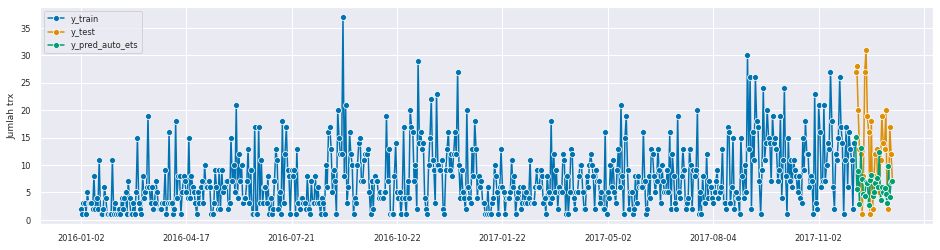

In [81]:
# plot the forecast result
plot_series(y_train, y_test, y_pred_auto_ets, labels=["y_train", "y_test", "y_pred_auto_ets"]);

In [82]:
mean_absolute_percentage_error(y_test, y_pred_ets) * 100

201.4783482770654

In [83]:
#AutoETS
# define auto ets forecaster model
auto_ets_forecaster = AutoETS(auto=True, sp=250)

In [84]:
# fit forecaster to train data
auto_ets_forecaster.fit(y_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: 

AutoETS(auto=True, sp=250)

In [85]:
# do prediction based on forecast horizon we already defined
y_pred_auto_ets = auto_ets_forecaster.predict(fh=fh)

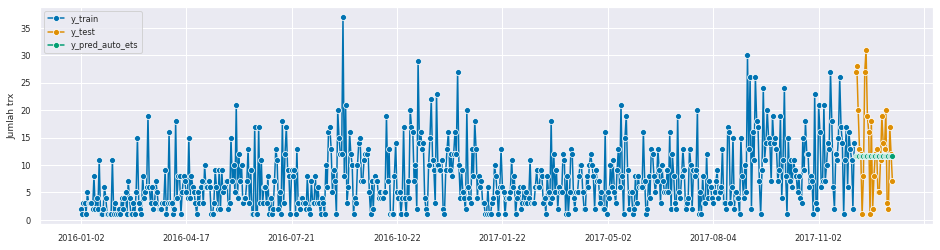

In [86]:
# plot the forecast result
plot_series(y_train, y_test, y_pred_auto_ets, labels=["y_train", "y_test", "y_pred_auto_ets"]);

In [87]:
mean_absolute_percentage_error(y_test, y_pred_auto_ets) * 100

149.51856443379285

Dari hasil model time series, model auto ets memiliki mape terkecil sehingga model auto ets lebih baik dari model ets

  # Rekomendasi

Dilihat dari pola yang terjadi bulan-bulan akhir mengalami peningkatan transaksi yang cukup tinggi jadi barang-barang yang fast moving yang laku di jual harus tetap tersedia agar transaksi tidak mengalami penurunan.

Serta dilihat dari jumlah visitor yang cukup tinggi di mana kebanyakan customer berkunjung di hari minggu dan senin jadi waktu yang tepat untuk melakukan event dalam meningkatkan penjualan ataupun promosi product-product baru untuk tetap menarik customer lebih banyak kembali.